In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("ship_fuel_efficiency.csv")

In [3]:
print("✅ Dataset Loaded Successfully!")
print(df.head())

✅ Dataset Loaded Successfully!
  ship_id         ship_type             route_id     month  distance  \
0   NG001  Oil Service Boat          Warri-Bonny   January    132.26   
1   NG001  Oil Service Boat  Port Harcourt-Lagos  February    128.52   
2   NG001  Oil Service Boat  Port Harcourt-Lagos     March     67.30   
3   NG001  Oil Service Boat  Port Harcourt-Lagos     April     71.68   
4   NG001  Oil Service Boat          Lagos-Apapa       May    134.32   

  fuel_type  fuel_consumption  CO2_emissions weather_conditions  \
0       HFO           3779.77       10625.76             Stormy   
1       HFO           4461.44       12779.73           Moderate   
2       HFO           1867.73        5353.01               Calm   
3    Diesel           2393.51        6506.52             Stormy   
4       HFO           4267.19       11617.03               Calm   

   engine_efficiency  
0              92.14  
1              92.98  
2              87.61  
3              87.42  
4              85.

In [4]:
print("\nColumns in dataset:")
print(df.columns.tolist())


Columns in dataset:
['ship_id', 'ship_type', 'route_id', 'month', 'distance', 'fuel_type', 'fuel_consumption', 'CO2_emissions', 'weather_conditions', 'engine_efficiency']


In [5]:
print("\nShape of dataset (rows, columns):", df.shape)


Shape of dataset (rows, columns): (1440, 10)


In [6]:
print("✅ Checking for missing values in each column:\n")
print(df.isnull().sum())

✅ Checking for missing values in each column:

ship_id               0
ship_type             0
route_id              0
month                 0
distance              0
fuel_type             0
fuel_consumption      0
CO2_emissions         0
weather_conditions    0
engine_efficiency     0
dtype: int64


In [7]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
print("\nNumeric columns:", numeric_cols.tolist())


Numeric columns: ['distance', 'fuel_consumption', 'CO2_emissions', 'engine_efficiency']


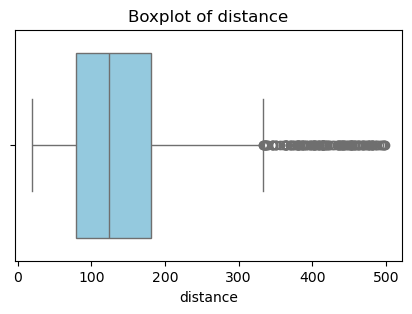

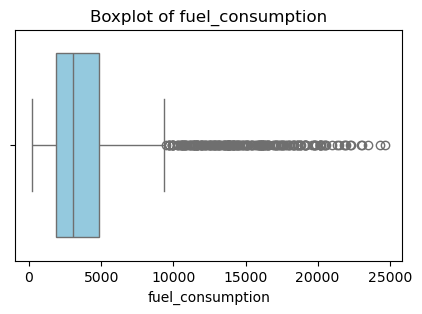

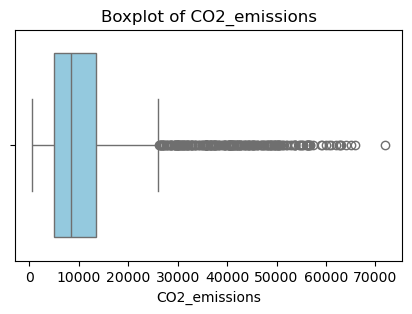

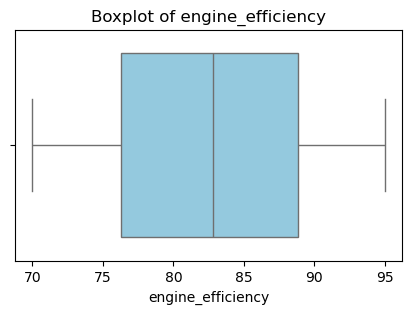

In [8]:
for col in numeric_cols:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f"Boxplot of {col}")
    plt.show()

In [9]:
print("\nOutlier summary using IQR method:\n")
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]
    print(f"{col}: {len(outliers)} outliers detected")


Outlier summary using IQR method:

distance: 145 outliers detected
fuel_consumption: 226 outliers detected
CO2_emissions: 230 outliers detected
engine_efficiency: 0 outliers detected


In [10]:


numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()


numeric_cols = [col for col in numeric_cols if col != 'engine_efficiency']


X_vif = df[numeric_cols]


vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print("\n✅ Variance Inflation Factor (VIF) Results:")
print(vif_data.sort_values(by="VIF", ascending=False))



✅ Variance Inflation Factor (VIF) Results:
            Feature         VIF
1  fuel_consumption  372.565986
2     CO2_emissions  358.286668
0          distance   13.752275


In [11]:


df = df.drop(columns=['CO2_emissions'])


df = df.drop(columns=['ship_id', 'route_id'])


print("✅ Remaining columns after dropping:")
print(df.columns.tolist())


✅ Remaining columns after dropping:
['ship_type', 'month', 'distance', 'fuel_type', 'fuel_consumption', 'weather_conditions', 'engine_efficiency']


In [12]:



cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns to be encoded:", cat_cols)

df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)


print("\n✅ After encoding, dataset shape:", df_encoded.shape)
print("First few columns after encoding:\n", df_encoded.columns[:10].tolist())


print("\nPreview of encoded data:")
print(df_encoded.head())


Categorical columns to be encoded: ['ship_type', 'month', 'fuel_type', 'weather_conditions']

✅ After encoding, dataset shape: (1440, 20)
First few columns after encoding:
 ['distance', 'fuel_consumption', 'engine_efficiency', 'ship_type_Oil Service Boat', 'ship_type_Surfer Boat', 'ship_type_Tanker Ship', 'month_August', 'month_December', 'month_February', 'month_January']

Preview of encoded data:
   distance  fuel_consumption  engine_efficiency  ship_type_Oil Service Boat  \
0    132.26           3779.77              92.14                        True   
1    128.52           4461.44              92.98                        True   
2     67.30           1867.73              87.61                        True   
3     71.68           2393.51              87.42                        True   
4    134.32           4267.19              85.61                        True   

   ship_type_Surfer Boat  ship_type_Tanker Ship  month_August  month_December  \
0                  False            

In [13]:


from sklearn.model_selection import train_test_split


X = df_encoded.drop(columns=['engine_efficiency'])
y = df_encoded['engine_efficiency']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


print("✅ Train-Test Split Done!")
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)


✅ Train-Test Split Done!
Training features shape: (1152, 19)
Testing features shape: (288, 19)
Training target shape: (1152,)
Testing target shape: (288,)


In [14]:


from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np


linear_model = LinearRegression()


linear_model.fit(X_train, y_train)


y_pred_linear = linear_model.predict(X_test)


r2 = r2_score(y_test, y_pred_linear)
mae = mean_absolute_error(y_test, y_pred_linear)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_linear))

print("✅ Linear Regression Results:")
print("R² (Coefficient of Determination):", round(r2, 4))
print("MAE (Mean Absolute Error):", round(mae, 4))
print("RMSE (Root Mean Squared Error):", round(rmse, 4))


✅ Linear Regression Results:
R² (Coefficient of Determination): -0.0036
MAE (Mean Absolute Error): 6.0555
RMSE (Root Mean Squared Error): 7.0509


In [15]:


from sklearn.linear_model import Lasso


lasso_model = Lasso(alpha=0.1, max_iter=10000, random_state=42)


lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)


r2 = r2_score(y_test, y_pred_lasso)
mae = mean_absolute_error(y_test, y_pred_lasso)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

print("✅ Lasso Regression Results:")
print("R²:", round(r2, 4))
print("MAE:", round(mae, 4))
print("RMSE:", round(rmse, 4))


✅ Lasso Regression Results:
R²: 0.0062
MAE: 6.0093
RMSE: 7.0165


In [17]:


from sklearn.linear_model import Ridge


ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train, y_train)


y_pred_ridge = ridge_model.predict(X_test)


r2 = r2_score(y_test, y_pred_ridge)
mae = mean_absolute_error(y_test, y_pred_ridge)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

print("✅ Ridge Regression Results:")
print("R²:", round(r2, 4))
print("MAE:", round(mae, 4))
print("RMSE:", round(rmse, 4))





✅ Ridge Regression Results:
R²: -0.0035
MAE: 6.0552
RMSE: 7.0507


In [18]:


from sklearn.linear_model import ElasticNet


elastic_model = ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000, random_state=42)
elastic_model.fit(X_train, y_train)


y_pred_elastic = elastic_model.predict(X_test)


r2 = r2_score(y_test, y_pred_elastic)
mae = mean_absolute_error(y_test, y_pred_elastic)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_elastic))

print("✅ Elastic Net Regression Results:")
print("R²:", round(r2, 4))
print("MAE:", round(mae, 4))
print("RMSE:", round(rmse, 4))


✅ Elastic Net Regression Results:
R²: 0.0062
MAE: 6.0144
RMSE: 7.0164


In [19]:
import joblib, json

# Save the model that gave best performance (Lasso)
joblib.dump(lasso_model, "best_model.pkl")

# Save the feature names (column names used for training)
model_columns = list(X.columns)
with open("model_columns.json", "w") as f:
    json.dump(model_columns, f)

print("✅ Model and column names saved successfully!")


✅ Model and column names saved successfully!
